In [1]:
%pip install deap

Note: you may need to restart the kernel to use updated packages.


**DEVIATIAROVA EKATERINA**

The goal is to train evolutoinary algorithm to solve classic optimization function. The function is **Rastrigin** function, but it is reversed and shifted.
The maximum value that you can achieve is 10 and this is your goal!

Send me a link to your colab notebook to
***michael.melnik@itmo.ru***

In [2]:
import numpy
import deap
import math
import numpy as np
from deap import tools, base, creator, algorithms
import numpy.random as rnd
import matplotlib.pyplot as plt

In [3]:
#Shifted Rastrigin function

noise = rnd.random(1000)

def rastrigin(individual):
    individual = individual + noise[0:len(individual)]
    n = len(individual)

    pi = math.pi
    dn = 1.0 / n
    a = 10.0
    b = 0.2
    c = 2 * pi
    s1 = 0.0
    s2 = 0.0
    for i in range(n):
        s1 += individual[i] * individual[i]
        s2 += np.cos(c*individual[i])
    s1 = -a * math.exp(-b*math.sqrt(dn*s1))
    s2 = -math.exp(dn*s2)
    result = s1+s2 + a + math.exp(1)
    result = -result
    result = result + a
    result = math.fabs(result)
    return result

In [4]:
solution = [0 for _ in range(20)]
rastrigin(solution)

7.292785048463948

In [5]:
creator.create("BaseFitness", base.Fitness, weights=(1.0,))
creator.create("Individual", np.ndarray, fitness=creator.BaseFitness)


In [6]:
def mutation(individual):
    n = len(individual)
    for i in range(n):
        if rnd.random() < n * 0.15:
            individual[i] += rnd.normal(0.0, 0.2)
            individual[i] = np.clip(individual[i], -5, 5)
    return individual,

### Changes
<ul>
<li>self.engine.register("mate", tools.cxOnePoint) --> self.engine.register("mate", tools.cxBlend, alpha=0.5)</li>

<li>self.engine.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.2) --> self.engine.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.02)</li>

<li>self.engine.register("select", tools.selTournament, tournsize=4) --> self.engine.register("select", tools.selTournament, tournsize=3)</li>

</ul>

In [14]:
class SimpleGAExperiment:
    def factory(self):
        return rnd.random(self.dimension) * 10 - 5  # random range from -5 to 5

    def __init__(self, function, dimension, pop_size, iterations):
        self.pop_size = pop_size
        self.iterations = iterations
        self.mut_prob = 0.6
        self.cross_prob = 0.3

        self.function = function
        self.dimension = dimension

        self.engine = base.Toolbox()
        self.engine.register("map", map)
        self.engine.register("individual", tools.initIterate, creator.Individual, self.factory)
        self.engine.register("population", tools.initRepeat, list, self.engine.individual, self.pop_size)
        self.engine.register("mate", tools.cxBlend, alpha=0.5)
        self.engine.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.02)
        self.engine.register("select", tools.selTournament, tournsize=3)
        self.engine.register("evaluate", self.function)

    def run(self):
        pop = self.engine.population()
        hof = tools.HallOfFame(3, np.array_equal)
        stats = tools.Statistics(lambda ind: ind.fitness.values[0])
        stats.register("avg", np.mean)
        stats.register("std", np.std)
        stats.register("min", np.min)
        stats.register("max", np.max)

        pop, log = algorithms.eaMuPlusLambda(pop, self.engine, mu=self.pop_size, lambda_=int(self.pop_size*0.8),
                                             cxpb=self.cross_prob, mutpb=self.mut_prob,
                                             ngen=self.iterations, stats=stats, halloffame=hof, verbose=True)
        print("Best = {}".format(hof[0]))
        print("Best fit = {}".format(hof[0].fitness.values[0]))
        return log

In [15]:
def function(x):
    res = rastrigin(x)
    return res,

dimension = 100 # set it to 100
pop_size = 100 # lets say max is 100
iterations = 5000 # lets say max is 5000
scenario = SimpleGAExperiment(function, dimension, pop_size, iterations)

In [16]:
def read_log(log):
    avg_list = list()
    std_list = list()
    min_list = list()
    max_list = list()
    gen_list = list()
    for g in log:
        avg_list.append(g['avg'])
        std_list.append(g['std'])
        min_list.append(g['min'])
        max_list.append(g['max'])
        gen_list.append(g['gen'])
    return np.array(gen_list), np.array(avg_list), np.array(std_list), np.array(max_list), np.array(min_list)

def draw_log(log):
    gen_list, avg_list, std_list, max_list, min_list = read_log(log)
    plt.plot(gen_list, avg_list, label="avg")
    plt.plot(gen_list, min_list, label="min")
    plt.plot(gen_list, max_list, label="max")
    plt.fill_between(gen_list, avg_list-std_list, avg_list+std_list, alpha=0.2)
    plt.legend()
    plt.tight_layout()
    plt.show()

def draw_logs(log1, log2, lab1, lab2):
    gen1, avg1, std1, max1, min1 = read_log(log1)
    gen2, avg2, std2, max2, min2 = read_log(log2)
    plt.plot(gen1, avg1, label=lab1, color="blue")
    plt.plot(gen1, max1, label="{}_max".format(lab1), color="blue", linewidth=2)
    plt.fill_between(gen1, avg1 - std1, avg1 + std1, alpha=0.2, color="blue")
    plt.plot(gen2, avg2, label=lab2, color="orange")
    plt.plot(gen2, max2, label="{}_max".format(lab2), color="orange", linewidth=2)
    plt.fill_between(gen2, avg2 - std2, avg2 + std2, alpha=0.2, color="orange")
    plt.legend()
    plt.tight_layout()
    plt.show()


gen	nevals	avg    	std     	min    	max    
0  	100   	3.85677	0.184985	3.45474	4.37837
1  	70    	4.01539	0.15869 	3.67062	4.40958
2  	75    	4.12799	0.145603	3.77857	4.40958
3  	72    	4.22525	0.123454	3.9853 	4.40958
4  	73    	4.31926	0.0884869	4.09759	4.40958
5  	78    	4.37469	0.0390282	4.18293	4.40958
6  	74    	4.39885	0.0146148	4.36347	4.43163
7  	72    	4.41585	0.0174345	4.38433	4.47431
8  	71    	4.42926	0.0168363	4.40066	4.49686
9  	68    	4.44425	0.0218756	4.41177	4.5332 
10 	71    	4.46328	0.0253379	4.42431	4.5332 
11 	67    	4.48188	0.0238635	4.43751	4.53881
12 	73    	4.49748	0.0195905	4.4522 	4.5332 
13 	73    	4.51318	0.0178879	4.48288	4.56202
14 	71    	4.52977	0.0161028	4.49686	4.58959
15 	69    	4.54418	0.0174377	4.51211	4.60074
16 	75    	4.55893	0.0182276	4.52786	4.60074
17 	73    	4.57493	0.0203425	4.53218	4.64317
18 	66    	4.59194	0.0180304	4.55244	4.64317
19 	76    	4.60978	0.0189578	4.55549	4.65103
20 	68    	4.62653	0.016098 	4.58717	4.66203
21 	74    	4.64

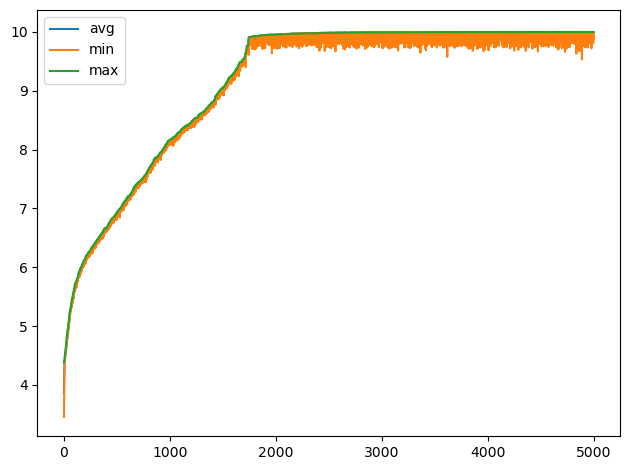

In [17]:
log = scenario.run()
draw_log(log)